### Preprocessing Visuals

In [10]:
# prompt: load csv file

import pandas as pd

# Replace 'your_file.csv' with the actual path to your CSV file.
# If the file is in your current working directory, you can just use the filename.
# If it's in Google Drive, mount your drive first and provide the full path.
df = pd.read_csv('/content/elderly_online_safety_with_inconsistencies.csv')

# Display the first few rows of the DataFrame (optional)
print(df.head())


   Age  Gender Education Level  Tech Savviness  Hours Spent Online Daily  \
0   61    Male         College             6.0                       5.2   
1   85  Female     High School             5.0                       2.7   
2   65  Female        Graduate             6.0                       9.2   
3   82  Female        Graduate             6.0                       1.1   
4   80  Female        Graduate             6.0                       NaN   

  Primary Device Used Social Media Usage  Email Awareness  Password Practices  \
0              Tablet                Yes                7                   2   
1              Tablet                Yes                7                   4   
2          Smartphone                Yes                8                   4   
3              Laptop                Yes                5                   3   
4              Laptop                Yes                6                   2   

  Two-Factor Authentication (2FA) Scam History Scam Type

In [ ]:
# prompt: histogram for 'Age'

import pandas as pd
import matplotlib.pyplot as plt

# Replace 'your_file.csv' with the actual path to your CSV file.
# If the file is in your current working directory, you can just use the filename.
# If it's in Google Drive, mount your drive first and provide the full path.
df = pd.read_csv('/content/elderly_online_safety_with_inconsistencies.csv')

# Create the histogram
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.hist(df['Age'], bins=10, edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [ ]:
# Frequency distribution of categorical features
categorical_features = ["Primary Device Used", "Scam Type Encountered"]
for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    df[feature].value_counts(dropna=False).plot(kind="bar", color="lightgreen")
    plt.title(f"Frequency Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()


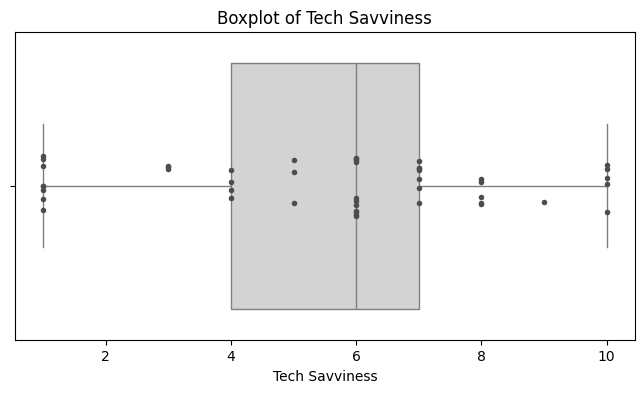

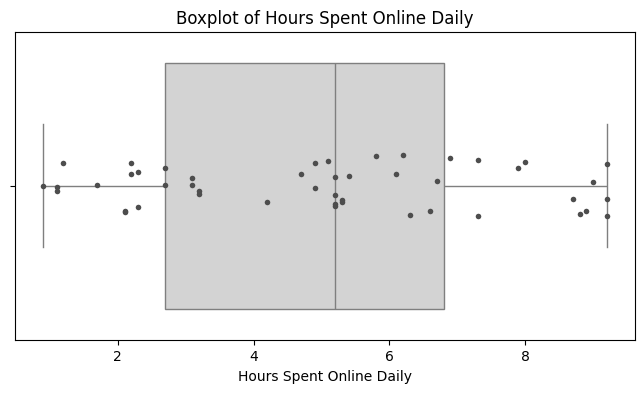

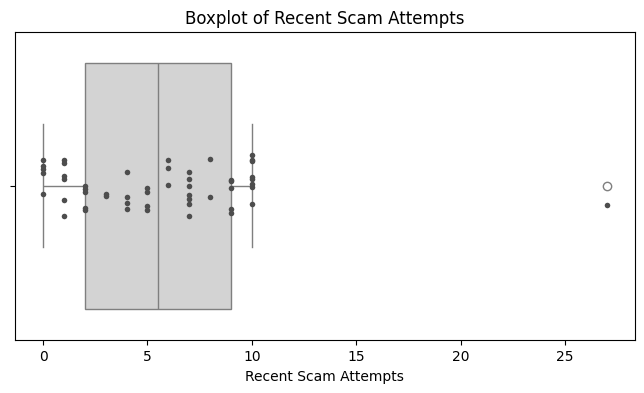

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot boxplots for numerical features with points overlaid
numerical_features = ["Tech Savviness", "Hours Spent Online Daily", "Recent Scam Attempts"]
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[feature], color='lightgray')  # Create the boxplot
    sns.stripplot(x=df[feature], size=4, color='.3')  # Overlay points
    plt.title(f"Boxplot of {feature}")
    plt.show()


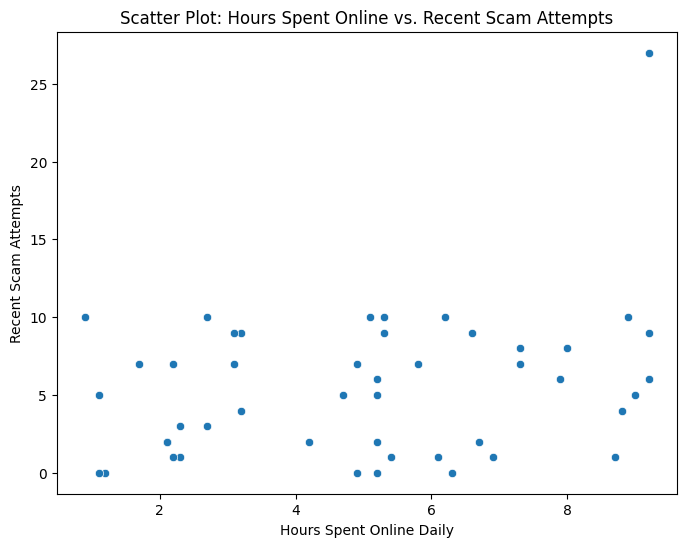

In [ ]:
# Scatter plot of "Hours Spent Online Daily" vs. "Recent Scam Attempts"
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["Hours Spent Online Daily"], y=df["Recent Scam Attempts"])
plt.title("Scatter Plot: Hours Spent Online vs. Recent Scam Attempts")
plt.xlabel("Hours Spent Online Daily")
plt.ylabel("Recent Scam Attempts")
plt.show()


In [ ]:
# Heatmap of missing values
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Heatmap of Missing Values")
plt.show()


Number of duplicate rows: 1
Sample duplicate rows:
    Age Gender Education Level  Tech Savviness  Hours Spent Online Daily  \
50   61   Male         College            10.0                       2.1   

   Primary Device Used Social Media Usage  Email Awareness  \
50          Smartphone                Yes                3   

    Password Practices Two-Factor Authentication (2FA) Scam History  \
50                   1                             Yes          Yes   

   Scam Type Encountered Awareness Programs Attended  \
50                   NaN                         Yes   

    Confidence in Identifying Scams  Recent Scam Attempts  Safety Score  \
50                                8                     2         36.98   

   Online Safety  
50          Safe  


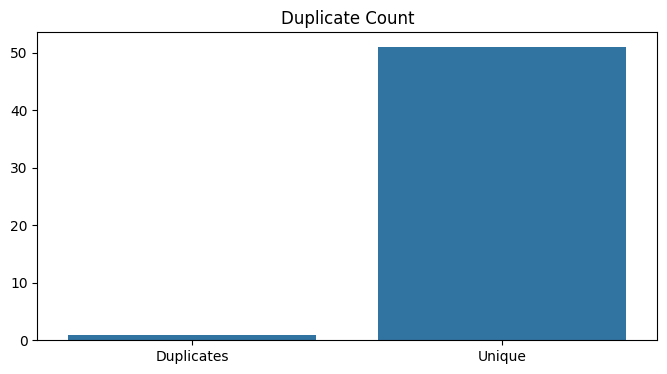

In [15]:
# Detect and visualize duplicates
duplicate_rows = df[df.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

# Display a few duplicate rows
if not duplicate_rows.empty:
    print("Sample duplicate rows:")
    print(duplicate_rows.head())

# Plot duplicate counts (if any)
plt.figure(figsize=(8, 4))
sns.barplot(x=["Duplicates", "Unique"], y=[len(duplicate_rows), len(df) - len(duplicate_rows)])
plt.title("Duplicate Count")
plt.show()


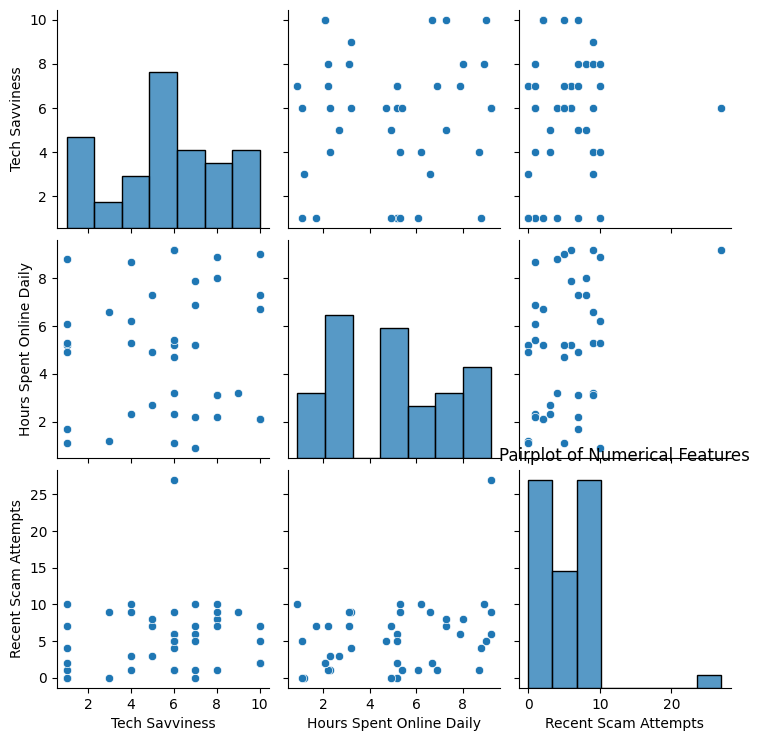

In [16]:
sns.pairplot(df[numerical_features].dropna())
plt.title("Pairplot of Numerical Features")
plt.show()


In [ ]:
# Correlation of missingness
missing_corr = df.isnull().corr()

# Heatmap of missingness correlation
plt.figure(figsize=(10, 6))
sns.heatmap(missing_corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Missing Values")
plt.show()


### ML

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Define features and target
X = df.drop(columns=["Online Safety"])  # Replace 'Target' with your actual target column name
y = df["Online Safety"]  # Replace with your target column

# Create a LabelEncoder for categorical features
categorical_features = X.select_dtypes(include=['object']).columns # Select columns with 'object' dtype
encoder = LabelEncoder()

# Apply Label Encoding to categorical features
for feature in categorical_features:
    X[feature] = encoder.fit_transform(X[feature])
    # Fit and transform on the entire dataset to ensure consistent encoding across train/test sets

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Predict on test data
y_pred = logreg.predict(X_test)

# Evaluate the model
print("Logistic Regression - Accuracy:", accuracy_score(y_test, y_pred))

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize and train the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on test data
y_pred = rf.predict(X_test)

# Evaluate the model
print("Random Forest - Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Random Forest - Accuracy: 1.0
Confusion Matrix:
 [[2 0 0]
 [0 4 0]
 [0 0 5]]
Classification Report:
               precision    recall  f1-score   support

    Moderate       1.00      1.00      1.00         2
    Not Safe       1.00      1.00      1.00         4
        Safe       1.00      1.00      1.00         5

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11



In [7]:
# prompt: i want to run a decision tree model on the same

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('/content/elderly_online_safety_with_inconsistencies.csv')

# Define features (X) and target (y)
X = df.drop(columns=["Online Safety"])
y = df["Online Safety"]

# Encode categorical features
categorical_features = X.select_dtypes(include=['object']).columns
encoder = LabelEncoder()
for feature in categorical_features:
    X[feature] = encoder.fit_transform(X[feature])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)  # You can adjust hyperparameters here
dt.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt.predict(X_test)

# Evaluate the model
print("Decision Tree - Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Decision Tree - Accuracy: 0.9090909090909091
Confusion Matrix:
 [[2 0 0]
 [0 4 0]
 [1 0 4]]
Classification Report:
               precision    recall  f1-score   support

    Moderate       0.67      1.00      0.80         2
    Not Safe       1.00      1.00      1.00         4
        Safe       1.00      0.80      0.89         5

    accuracy                           0.91        11
   macro avg       0.89      0.93      0.90        11
weighted avg       0.94      0.91      0.91        11



In [13]:
import pandas as pd
import numpy as np

# Load the raw data (replace 'raw_data.csv' with your file path)
data = pd.read_csv('/content/elderly_online_safety_with_inconsistencies.csv')

# --- Handle Missing Values ---
# Impute numerical columns with mean
numerical_cols = ['Age', 'Hours Spent Online Daily', 'Tech Savviness']
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].mean())

# Set Scam Type to "None" where Scam History is "No"
df.loc[(df["Scam History"] == "No") & (df["Scam Type Encountered"] != "None"), "Scam Type Encountered"] = "None"

# Impute categorical columns with mode
categorical_cols = ['Education Level']
for col in categorical_cols:
    data[col] = data[col].fillna(data[col].mode()[0])

# --- Handle Duplicates ---
data = data.drop_duplicates()

# --- Handle Outliers ---
# Function to replace outliers with mean value
def replace_outliers_with_mean(data, column_name):
    Q1 = data[column_name].quantile(0.25)  # 25th percentile
    Q3 = data[column_name].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1                          # Interquartile Range (IQR)

    # Define the bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Calculate mean value
    mean_value = data[column_name].mean()

    # Replace outliers with the mean value
    data[column_name] = np.where((data[column_name] < lower_bound) |
                                 (data[column_name] > upper_bound),
                                 mean_value,
                                 data[column_name])

# Replace outliers for 'Hours Spent Online Daily'
replace_outliers_with_mean(data, 'Hours Spent Online Daily')

# Replace outliers for 'Recent Scam Attempts'
replace_outliers_with_mean(data, 'Recent Scam Attempts')


# --- Correct Logical Anomalies ---
# Example: Ensure age >= 60 for elderly individuals
data.loc[data['Age'] < 60, 'Age'] = 60

# --- Save the Preprocessed Data ---
data.to_csv('preprocessed_data.csv', index=False)
print("Preprocessed data saved to 'preprocessed_data.csv'.")


Preprocessed data saved to 'preprocessed_data.csv'.
